# 1. Loading and Exploring Data¶


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
sns.set()
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")
import re
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import shap
import statsmodels.api as sm
import folium
from matplotlib.ticker import FuncFormatter
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import skew, probplot
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import joblib
from joblib import dump, load
from scipy import stats
import streamlit as st
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from folium.plugins import MarkerCluster
from geopy.distance import geodesic
from sklearn.preprocessing import LabelEncoder
from builtins import map

In [61]:
prop = pd.read_csv('uae-real-estate.csv')
prop.head()

,Name,B_type,Latitude,Longitude,Area,Bedrooms,Bathrooms,City,District,Price
0,Elegant Unit| Golf Views| High-Floor| Prime Area,Apartment,24.463860,54.595603,747,0,1,Abu Dhabi,Yas Island,1300000
1,Sea & City View | Full Facilities | Prime Area,Apartment,24.487354,54.395122,"1,524",2,3,Abu Dhabi,Al Reem Island,1700000
2,Hot Offer|Furnished 2BR+M|Full Sea View|High F...,Apartment,24.492602,54.392677,"1,615",2,3,Abu Dhabi,Al Reem Island,1650000
3,Amazing Deal| Huge Layout | Big Terrace| Inves...,Apartment,24.484639,54.404103,"1,220",1,2,Abu Dhabi,Al Reem Island,800000
4,Luxurious Lifestyl|Exclusive Amenities|Invest Now,Apartment,24.538734,54.410601,"5,315",4,5,Abu Dhabi,Saadiyat Island,19000000


In [62]:
prop.shape

(29905, 10)

In [63]:
prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29905 entries, 0 to 29904
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       29905 non-null  object 
 1   B_type     29905 non-null  object 
 2   Latitude   29905 non-null  float64
 3   Longitude  29905 non-null  float64
 4   Area       29905 non-null  object 
 5   Bedrooms   29905 non-null  int64  
 6   Bathrooms  29905 non-null  int64  
 7   City       29905 non-null  object 
 8   District   29905 non-null  object 
 9   Price      29905 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.3+ MB


In [64]:
# @title **3.3 Data Preprocessing**
def extract_view(Name):
    match = re.search(r'\b(\w+ View)\b', str(Name))
    if match:
        return match.group(1).strip()
    return None

# Apply the function to create a new column 'view'
prop['View'] = prop['Name'].apply(extract_view)
def extract_keywords(text, n_keywords=5):
    vectorizer = CountVectorizer(stop_words='english', max_features=n_keywords)
    try:
        X = vectorizer.fit_transform([str(text)])
        keywords = vectorizer.get_feature_names_out()
        return ', '.join(keywords) if keywords.size > 0 else "no keywords"
    except ValueError:
        return "no keywords"

prop['Bulding_Descripton'] = prop['Name'].apply(lambda x: extract_keywords(str(x), n_keywords=5))

prop.head()

,Name,B_type,Latitude,Longitude,Area,Bedrooms,Bathrooms,City,District,Price,View,Bulding_Descripton
0,Elegant Unit| Golf Views| High-Floor| Prime Area,Apartment,24.463860,54.595603,747,0,1,Abu Dhabi,Yas Island,1300000,None,"area, elegant, floor, golf, high"
1,Sea & City View | Full Facilities | Prime Area,Apartment,24.487354,54.395122,"1,524",2,3,Abu Dhabi,Al Reem Island,1700000,City View,"area, city, facilities, prime, sea"
2,Hot Offer|Furnished 2BR+M|Full Sea View|High F...,Apartment,24.492602,54.392677,"1,615",2,3,Abu Dhabi,Al Reem Island,1650000,Sea View,"2br, floor, furnished, high, hot"
3,Amazing Deal| Huge Layout | Big Terrace| Inves...,Apartment,24.484639,54.404103,"1,220",1,2,Abu Dhabi,Al Reem Island,800000,None,"amazing, big, deal, huge, invest"
4,Luxurious Lifestyl|Exclusive Amenities|Invest Now,Apartment,24.538734,54.410601,"5,315",4,5,Abu Dhabi,Saadiyat Island,19000000,None,"amenities, exclusive, invest, lifestyl, luxurious"


In [65]:
# @title
prop.columns = prop.columns.str.strip()
prop['Area'] = prop['Area'].str.replace(',', '').astype(float)
#Price per Square feet
prop['Price_per_Sqft'] = prop['Price'] / prop['Area']
#Average Property Price for the City
City_avg_price = prop.groupby('City')['Price'].mean().to_dict()
prop['City_Avg_Price'] = prop['City'].map(City_avg_price)
prop.drop(columns=['Name'], axis=1, inplace= True)
prop.head()

,B_type,Latitude,Longitude,Area,Bedrooms,Bathrooms,City,District,Price,View,Bulding_Descripton,Price_per_Sqft,City_Avg_Price
0,Apartment,24.463860,54.595603,747.0,0,1,Abu Dhabi,Yas Island,1300000,None,"area, elegant, floor, golf, high",1740.294511,4.329870e+06
1,Apartment,24.487354,54.395122,1524.0,2,3,Abu Dhabi,Al Reem Island,1700000,City View,"area, city, facilities, prime, sea",1115.485564,4.329870e+06
2,Apartment,24.492602,54.392677,1615.0,2,3,Abu Dhabi,Al Reem Island,1650000,Sea View,"2br, floor, furnished, high, hot",1021.671827,4.329870e+06
3,Apartment,24.484639,54.404103,1220.0,1,2,Abu Dhabi,Al Reem Island,800000,None,"amazing, big, deal, huge, invest",655.737705,4.329870e+06
4,Apartment,24.538734,54.410601,5315.0,4,5,Abu Dhabi,Saadiyat Island,19000000,None,"amenities, exclusive, invest, lifestyl, luxurious",3574.788335,4.329870e+06


In [66]:
# @title
# Create a new column named 'Id' as the index
prop['Id'] = range(len(prop))

# Set 'Id' as the first column
first_column = prop.pop('Id')
prop.insert(0, 'Id', first_column)

# Move the 'Price' column to the last
last_column = prop.pop('Price')
prop.insert(len(prop.columns), 'Price', last_column)
prop.set_index('Id', inplace=True)

# Print the first few rows of the modified DataFrame
prop.head()

,B_type,Latitude,Longitude,Area,Bedrooms,Bathrooms,City,District,View,Bulding_Descripton,Price_per_Sqft,City_Avg_Price,Price
Id,,,,,,,,,,,,,
0,Apartment,24.463860,54.595603,747.0,0,1,Abu Dhabi,Yas Island,None,"area, elegant, floor, golf, high",1740.294511,4.329870e+06,1300000
1,Apartment,24.487354,54.395122,1524.0,2,3,Abu Dhabi,Al Reem Island,City View,"area, city, facilities, prime, sea",1115.485564,4.329870e+06,1700000
2,Apartment,24.492602,54.392677,1615.0,2,3,Abu Dhabi,Al Reem Island,Sea View,"2br, floor, furnished, high, hot",1021.671827,4.329870e+06,1650000
3,Apartment,24.484639,54.404103,1220.0,1,2,Abu Dhabi,Al Reem Island,None,"amazing, big, deal, huge, invest",655.737705,4.329870e+06,800000
4,Apartment,24.538734,54.410601,5315.0,4,5,Abu Dhabi,Saadiyat Island,None,"amenities, exclusive, invest, lifestyl, luxurious",3574.788335,4.329870e+06,19000000


In [67]:
#@title **3.4 Create Distance_from_City_Center column**
city_centers = {
    'Abu Dhabi': {'lat': 24.453884, 'lon': 54.377344},
    'Dubai': {'lat': 25.276987, 'lon': 55.296249},
    'Sharjah': {'lat': 25.346255, 'lon': 55.420933},
    'Ajman': {'lat': 25.405216, 'lon': 55.513643},
    'Umm Al Quwain': {'lat': 25.564733, 'lon': 55.555174},
    'Ras Al Khaimah': {'lat': 25.800692, 'lon': 55.976200},
}

def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2.0) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0) ** 2
    c = 2 * np.arcsin(np.sqrt(a))

    # Radius of Earth in kilometers (mean radius)
    r = 6371.0
    return c * r

def find_nearest_city_center(lat, lon, city_centers):
    distances = {city: haversine(lat, lon, coords['lat'], coords['lon']) for city, coords in city_centers.items()}
    nearest_city = min(distances, key=distances.get)
    return nearest_city, distances[nearest_city]

# Calculate the distance to the nearest city center for each property
prop['Distance_from_City_Center'] = prop.apply(
    lambda row: find_nearest_city_center(row['Latitude'], row['Longitude'], city_centers)[1],
    axis=1
)

In [68]:
prop

,B_type,Latitude,Longitude,Area,Bedrooms,Bathrooms,City,District,View,Bulding_Descripton,Price_per_Sqft,City_Avg_Price,Price,Distance_from_City_Center
Id,,,,,,,,,,,,,,
0,Apartment,24.463860,54.595603,747.0,0,1,Abu Dhabi,Yas Island,None,"area, elegant, floor, golf, high",1740.294511,4.329870e+06,1300000,22.119166
1,Apartment,24.487354,54.395122,1524.0,2,3,Abu Dhabi,Al Reem Island,City View,"area, city, facilities, prime, sea",1115.485564,4.329870e+06,1700000,4.133802
2,Apartment,24.492602,54.392677,1615.0,2,3,Abu Dhabi,Al Reem Island,Sea View,"2br, floor, furnished, high, hot",1021.671827,4.329870e+06,1650000,4.576366
3,Apartment,24.484639,54.404103,1220.0,1,2,Abu Dhabi,Al Reem Island,None,"amazing, big, deal, huge, invest",655.737705,4.329870e+06,800000,4.362280
4,Apartment,24.538734,54.410601,5315.0,4,5,Abu Dhabi,Saadiyat Island,None,"amenities, exclusive, invest, lifestyl, luxurious",3574.788335,4.329870e+06,19000000,10.017048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29900,Townhouses,25.691032,55.784255,3702.0,4,3,Ras Al Khaimah,Al Hamra Village,None,"beach, br, launch, prices, villa",1958.400864,4.509206e+06,7250000,22.765497
29901,Townhouses,25.691032,55.784255,2110.0,3,2,Ras Al Khaimah,Al Hamra Village,None,"access, beach, br, canal, independent",1510.426540,4.509206e+06,3187000,22.765497
29902,Townhouses,25.722171,55.844276,1964.0,2,3,Ras Al Khaimah,Mina Al Arab,None,"bedrooms, maid, marbella, sensational",1145.621181,4.509206e+06,2250000,15.835813


# 2. Exploratory Data Analysis

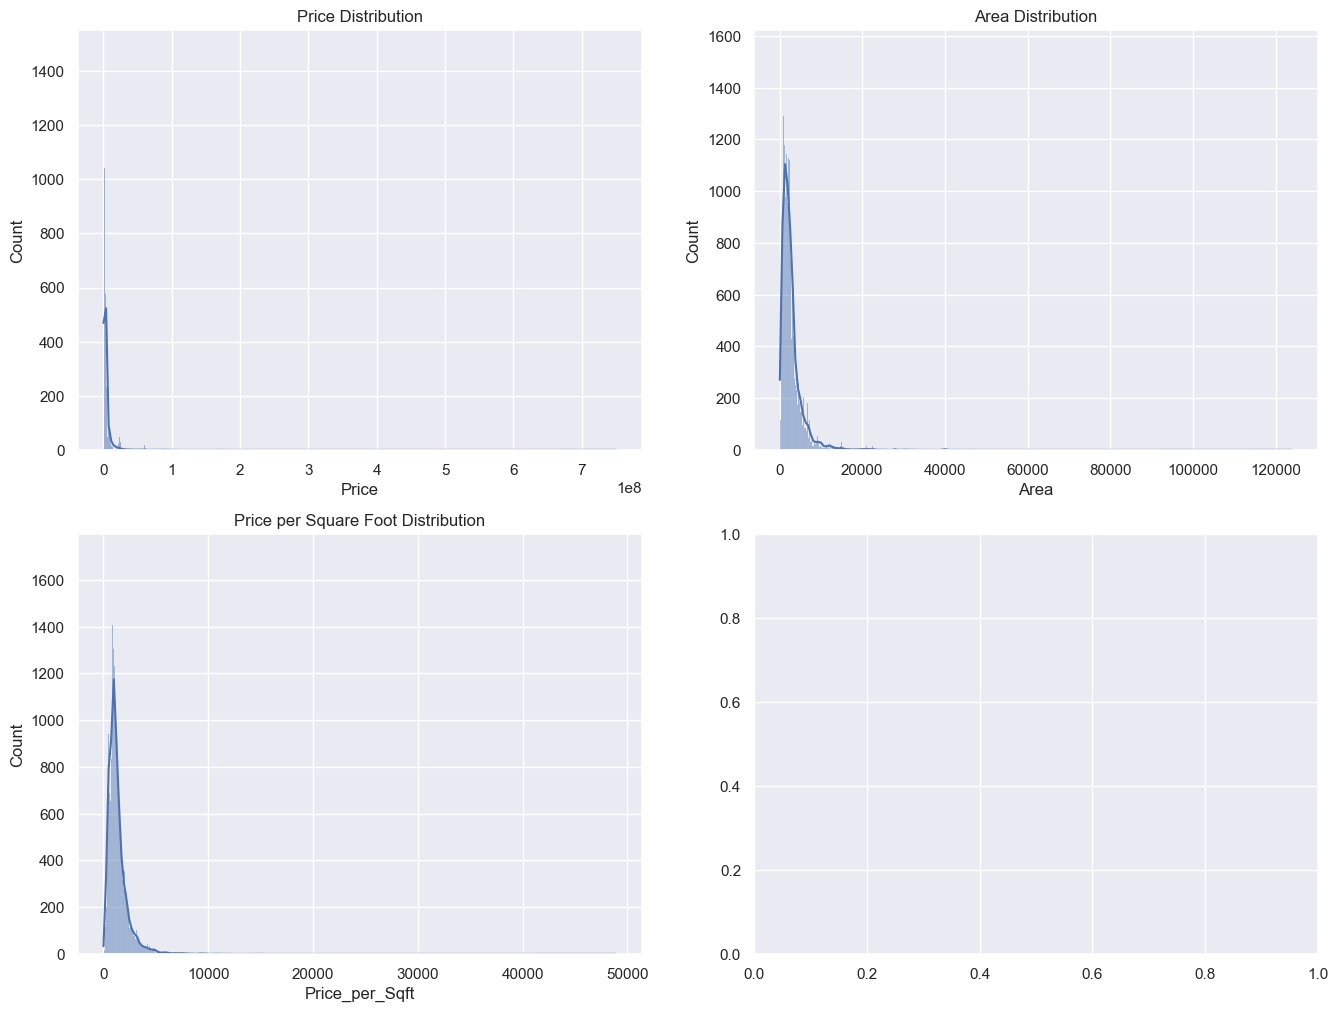

In [69]:
#@title **4.1 Price, Area, Square Per Foot Distribution**
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Price distribution
sns.histplot(prop['Price'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Price Distribution')

# Area Distribution
sns.histplot(prop['Area'], kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Area Distribution')

# Price per Square Foot Distribution
sns.histplot(prop['Price_per_Sqft'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Price per Square Foot Distribution')
# Adjust layout to prevent overlap
#plt.tight_layout()

# Show the plot
plt.show()

The histogram shows that most properties are clustered around certain price ranges. The peak around the 1 million price mark indicates that a significant number of properties are priced in that range.The distribution is right-skewed (positively skewed), meaning there are more properties at lower prices with a tail extending towards higher prices. This is typical in real estate markets where a few properties are extremely expensive compared to the majority.

There are 9 numeric variables.


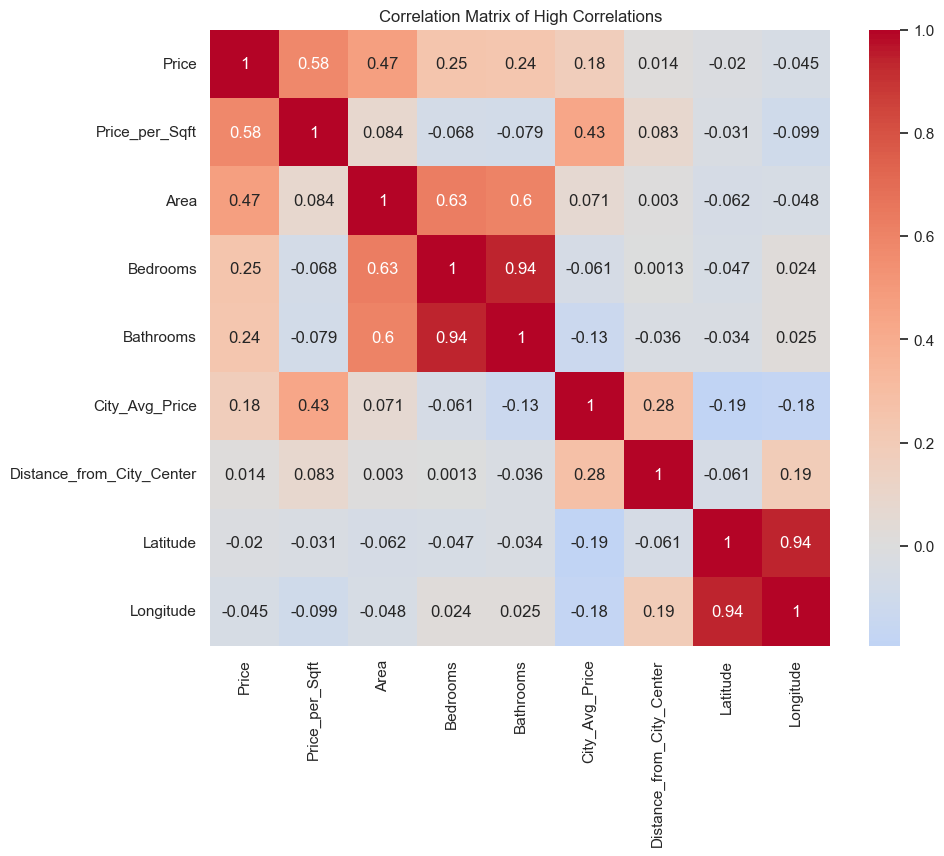

In [70]:
#@title **4.2 Correlation Matrix of High Correlations**
# Get the numeric variables
numeric_vars = prop.select_dtypes(include='number')

# Save the names of numeric variables
numeric_var_names = numeric_vars.columns.tolist()

# Output the count of numeric variables
print(f'There are {len(numeric_var_names)} numeric variables.')
all_numVar = prop[numeric_var_names]

# Calculate correlations of all numeric variables
cor_numVar = all_numVar.corr(method='pearson')

# Sort on decreasing correlations with 'Price'
cor_sorted = cor_numVar['Price'].sort_values(ascending=False).to_frame()

# Select only high correlations
CorHigh = cor_sorted[cor_sorted.abs() > 0.5].index

# Filter the correlation matrix for high correlations
cor_numVar = cor_numVar.loc[CorHigh, CorHigh]

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cor_numVar, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of High Correlations')
plt.show()

Price and Area: There is a moderate positive correlation (0.47) between Price and Area, indicating that larger properties tend to have higher prices.
Price and Bedrooms: A moderate positive correlation (0.25) exists between Price and Bedrooms, suggesting that properties with more bedrooms are generally priced higher.
Price and Price_per_SqM: A moderate positive correlation (0.58) shows that properties with a higher price per square meter tend to have higher overall prices.
Price and Bathrooms: There is a moderate positive correlation (0.24) between Price and Bathrooms, indicating that properties with more bathrooms are generally more expensive.

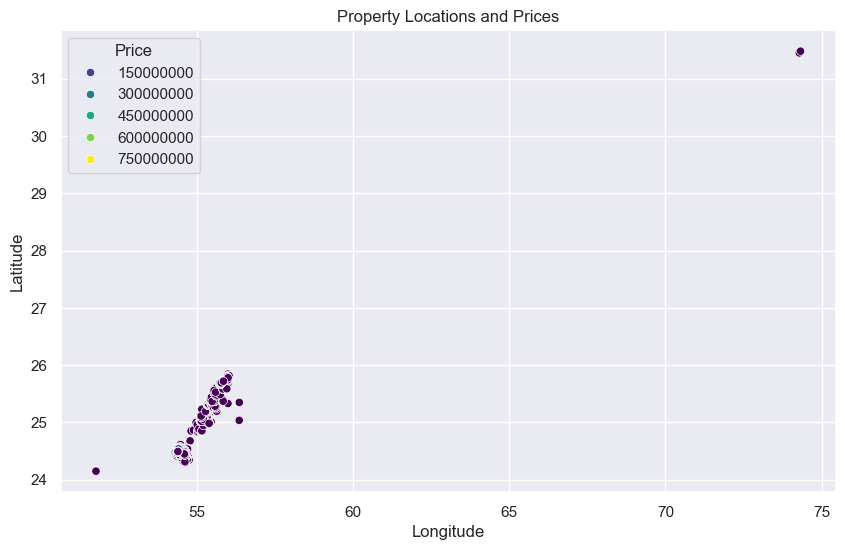

In [71]:
#@title **4.3 Property Locations and Prices**
sns.scatterplot(x='Longitude', y='Latitude', hue='Price', data=prop, palette='viridis')
plt.title('Property Locations and Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

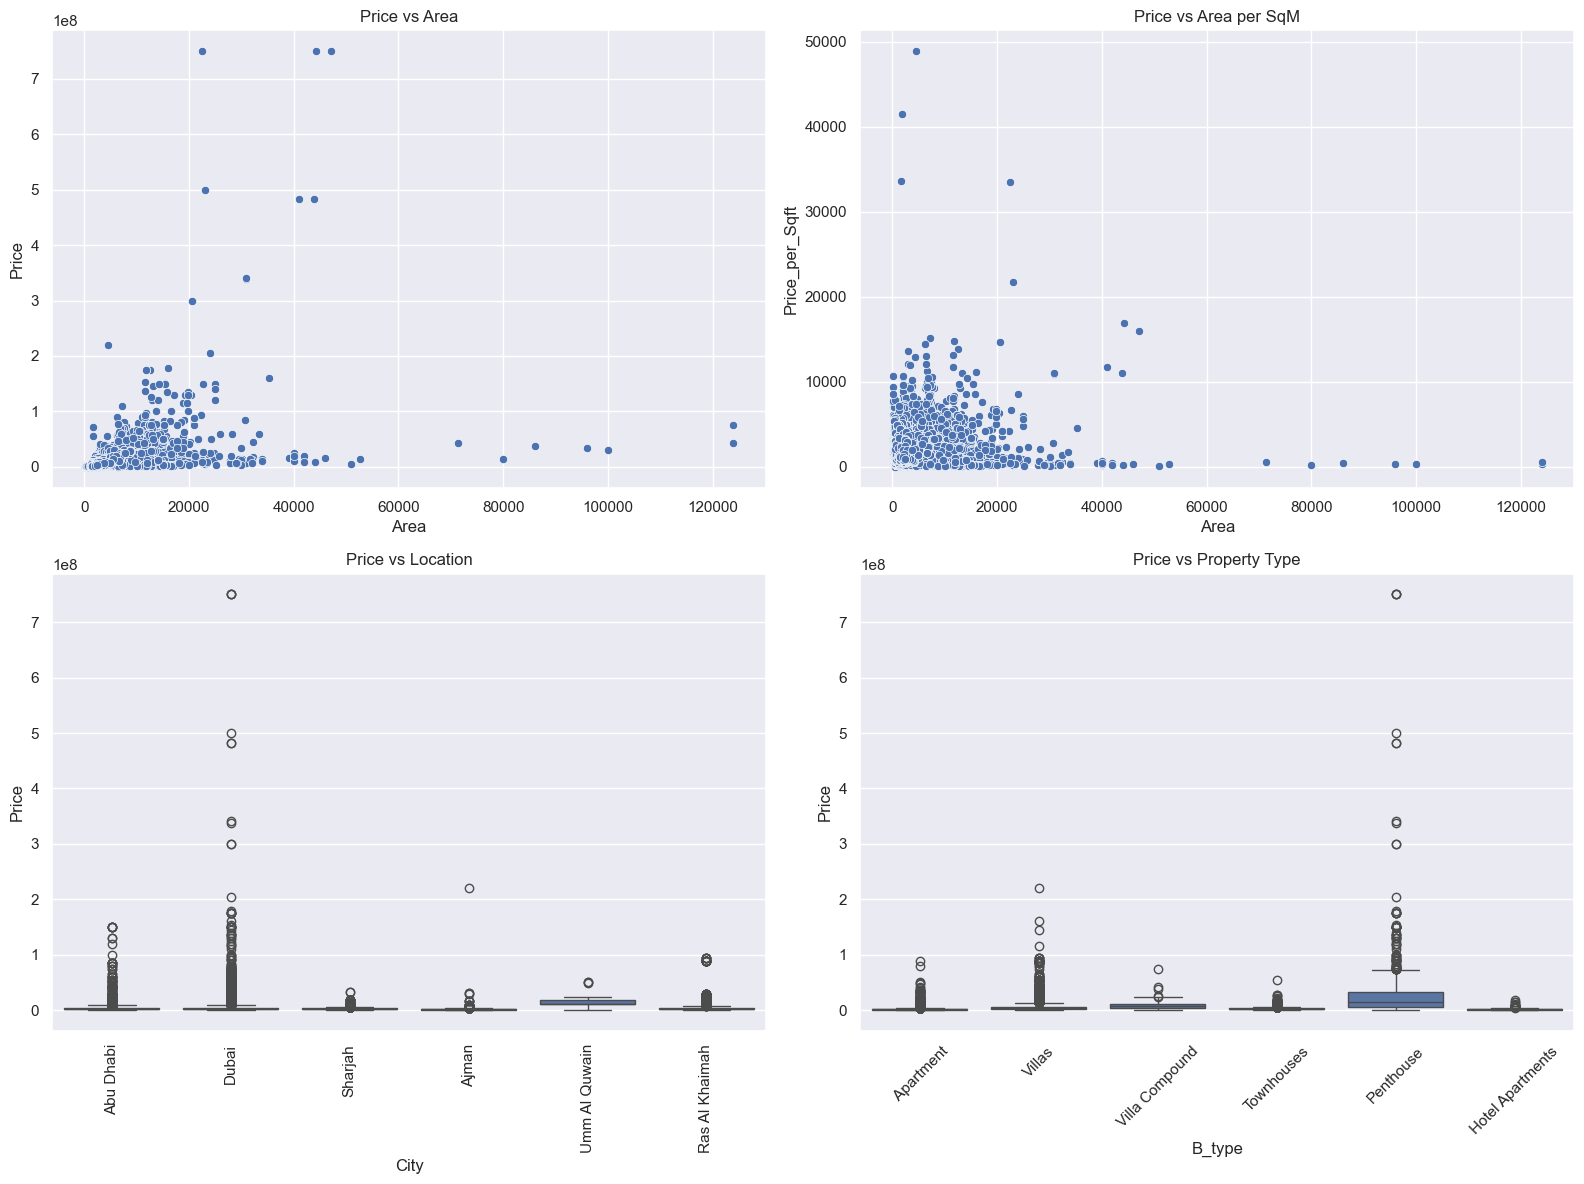

In [72]:
#@title **4.4 Relationship between price with area,Price_per_Sqft,Location, Property Type**
# Price vs Area
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Scatter Plot 1: Price vs Area
sns.scatterplot(x='Area', y='Price', data=prop, ax=axs[0, 0])
axs[0, 0].set_title('Price vs Area')

# Scatter Plot 2: Price vs Area per Square foot
sns.scatterplot(x='Area', y='Price_per_Sqft', data=prop, ax=axs[0, 1])
axs[0, 1].set_title('Price vs Area per SqM')

# Box Plot 1: Price vs Location (City)
sns.boxplot(x='City', y='Price', data=prop, ax=axs[1, 0])
axs[1, 0].set_title('Price vs Location')
axs[1, 0].tick_params(axis='x', rotation=90)

# Box Plot 2: Price vs Property Type (Building_Type)
sns.boxplot(x='B_type', y='Price', data=prop, ax=axs[1, 1])
axs[1, 1].set_title('Price vs Property Type')
axs[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

Top Left: Price vs Area This scatter plot shows the relationship between the property price and the area (in square meters). It indicates that generally, as the area increases, the price also increases. However, there's a wide spread of prices for a given area, suggesting that other factors also influence the price.
Top Right: Price vs Area per SqM This scatter plot shows the relationship between the price per square meter and the total area. It suggests that smaller properties tend to have a higher price per square meter. As the area increases, the price per square meter generally decreases.
Bottom Left: Price vs Location (City) This box plot shows the distribution of property prices across different cities. Properties in Abu Dhabi and Dubai tend to have higher prices compared to other cities. Umm Al Quwain has the lowest property prices among the listed cities.
Bottom Right: Price vs Property Type This box plot shows the distribution of property prices across different property types (Apartment, Residence, House). The prices of Houses and Residences appear to be higher on average compared to Apartments. However, there are outliers in all categories indicating a wide range of prices within each property type.

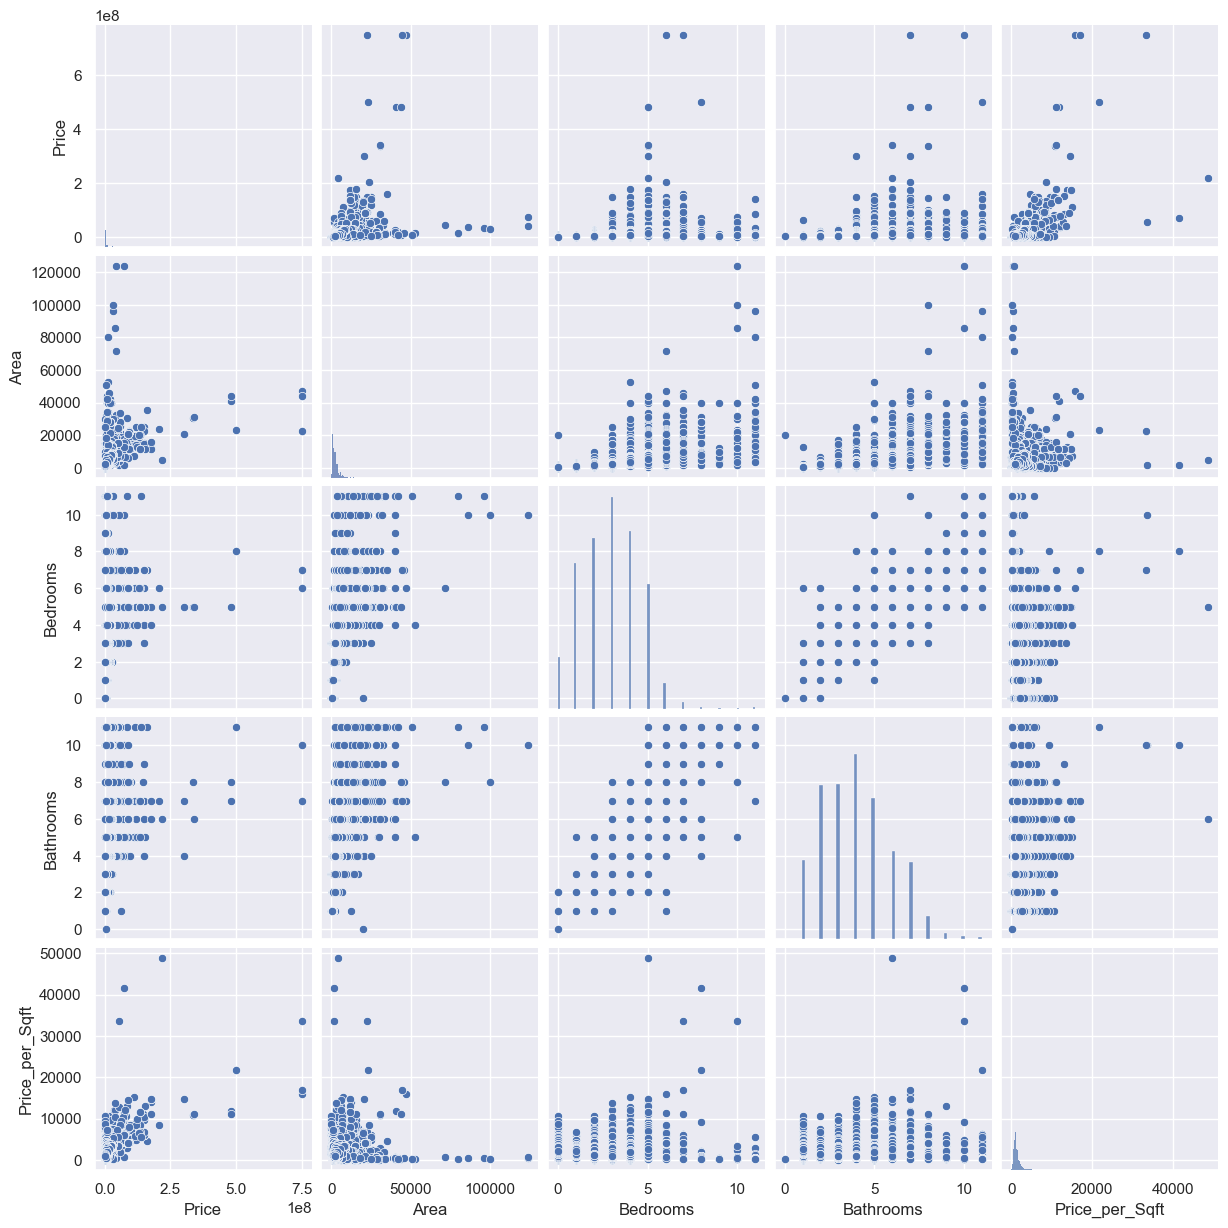

In [73]:
#@title **4.5 Pairplot**
#Analyze relationships between multiple numerical variables.
sns.pairplot(prop[['Price', 'Area', 'Bedrooms', 'Bathrooms','Price_per_Sqft']])
plt.show()

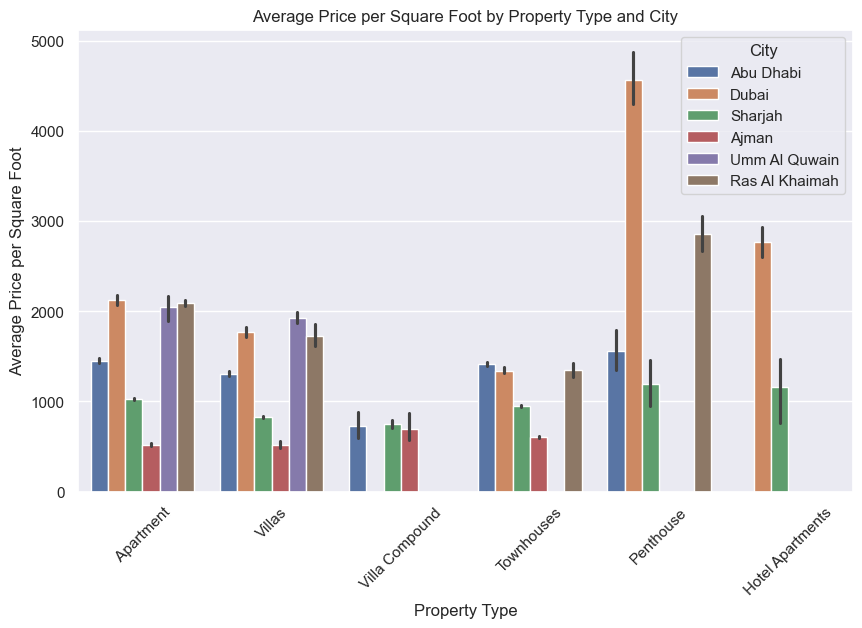

In [74]:
#@title **4.6 Average Price per Square Foot by Property Type and City**
prop.groupby(['B_type','City'])['Price_per_Sqft'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='B_type', y='Price_per_Sqft', hue='City', data=prop)
plt.title('Average Price per Square Foot by Property Type and City')
plt.xlabel('Property Type')
plt.ylabel('Average Price per Square Foot')
plt.xticks(rotation=45)
plt.show()

District
Business Bay                9586380859
Al Marjan Island            9501357992
Saadiyat Island             9466706961
Yas Island                  8516560890
Palm Jumeirah               7353317946
Al Seanneeah                5322663156
Tilal City                  4399511417
Al Reem Island              3282297114
Mohammed Bin Rashid City    2810155763
Al Rahmaniya                2757714573
Name: Price, dtype: int64


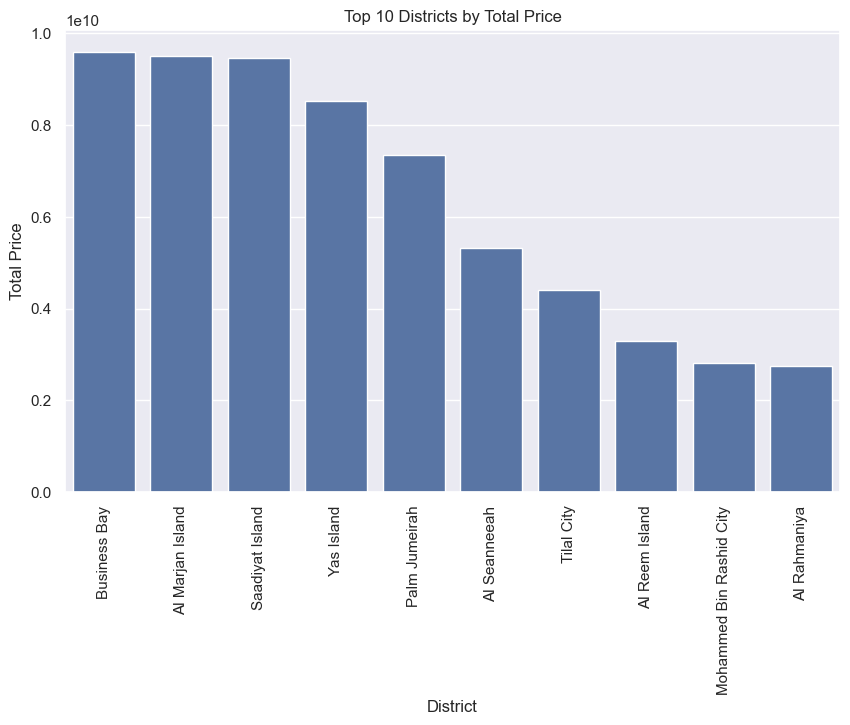

In [75]:
#@title **4.7 Top 10 Districts by Total Price**
top_10_district=prop.groupby('District')['Price'].sum().sort_values(ascending=False)
top_10_district=top_10_district.head(10)
print(top_10_district)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_district.index, y=top_10_district.values)
plt.title('Top 10 Districts by Total Price')
plt.xlabel('District')
plt.ylabel('Total Price')
plt.xticks(rotation=90)
plt.show()

City            B_type          
Abu Dhabi        Apartment          2736
Sharjah         Villas              2352
                 Apartment          2352
Ajman            Apartment          2352
                Villas              2352
Sharjah         Townhouses          2352
Dubai           Townhouses          2352
                 Apartment          2352
Ras Al Khaimah   Apartment          2352
Abu Dhabi       Townhouses          2184
                Villas              2088
Dubai           Villas              1152
                Penthouse            560
Ajman           Townhouses           414
Ras Al Khaimah  Villas               414
Umm Al Quwain   Villas               385
Dubai           Hotel Apartments     320
Ras Al Khaimah  Townhouses           263
Abu Dhabi       Penthouse            224
                Villa Compound        99
Sharjah         Villa Compound        85
Ras Al Khaimah  Penthouse             67
Umm Al Quwain    Apartment            53
Ajman           Villa Co

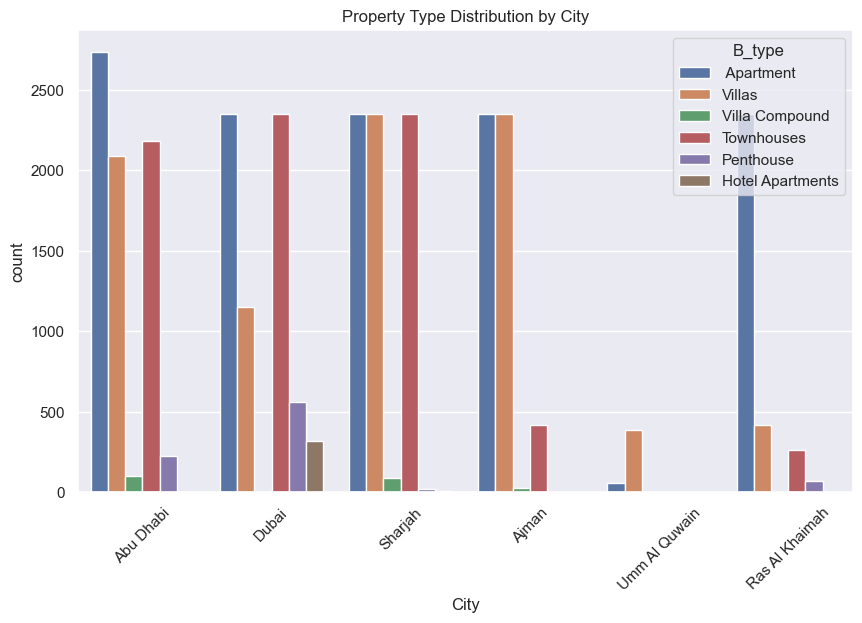

In [76]:
#@title **4.8 Property Type Distribution by City**
prop10=prop.groupby('City')['B_type'].value_counts().sort_values(ascending=False)
print(prop10)
plt.figure(figsize=(10, 6))
sns.countplot(x='City', hue='B_type', data=prop)
plt.title('Property Type Distribution by City')
plt.xticks(rotation=45)
plt.show()

B_type
 Apartment          12197
Villas               8743
Townhouses           7565
Penthouse             868
Hotel Apartments      325
Villa Compound        207
Name: count, dtype: int64


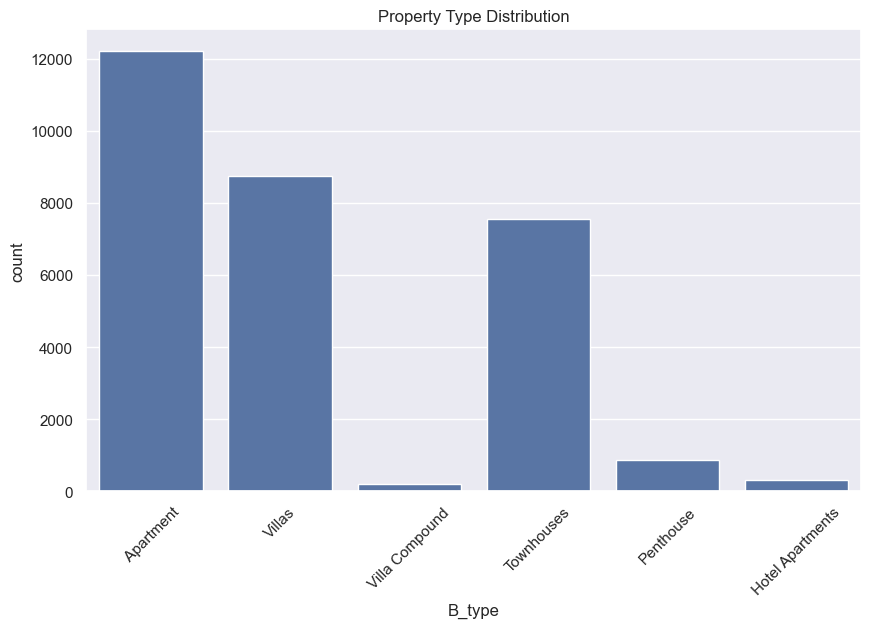

In [77]:
#@title **4.9 Property type distribution**
# Analyze the distribution of property types.
b_type = sns.countplot(x='B_type', data=prop)
print (prop['B_type'].value_counts())
plt.title('Property Type Distribution')
plt.xticks(rotation=45)
plt.show()

In [78]:
#@title **4.10 Top 10 Property Type per District**
top_10_prop_per_type=prop.groupby('District')['B_type'].value_counts().sort_values(ascending=False)
top_10_prop_per_type=top_10_prop_per_type.head(10)
print(top_10_prop_per_type)

District          B_type    
Al Marjan Island   Apartment    1529
Yas Island        Townhouses    1350
Al Reem Island     Apartment    1292
Aljada             Apartment     890
Al Rashidiya       Apartment     888
Al Yasmeen        Villas         775
Barashi           Townhouses     749
Al Rahmaniya      Townhouses     705
Muwaileh           Apartment     654
Tilal City        Villas         600
Name: count, dtype: int64


B_type
Penthouse           750000000
Villas              220000000
 Apartment           87999999
Villa Compound       75000000
Townhouses           55000000
Hotel Apartments     18000000
Name: Price, dtype: int64


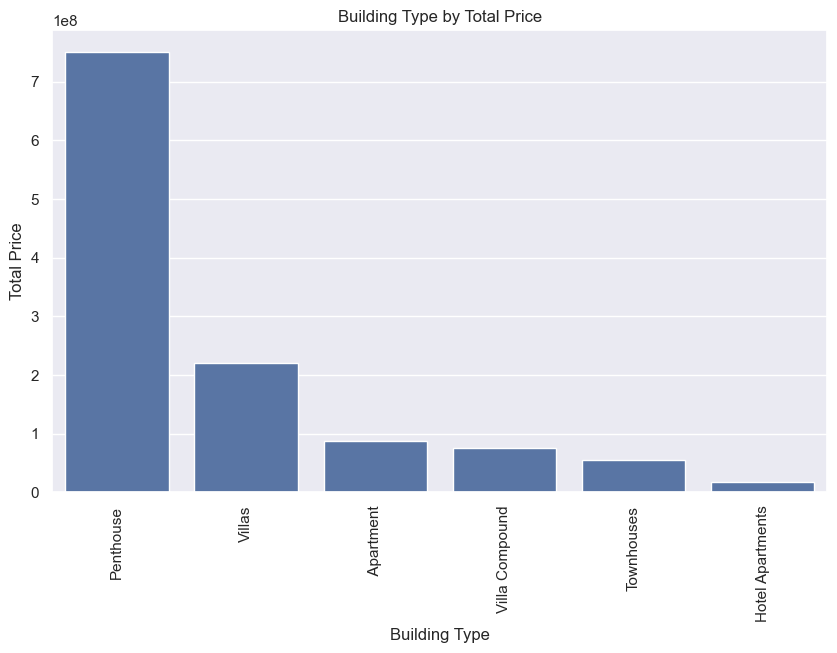

In [79]:
#@title **4.11 Building Type by Total Price**
max_price_prop=prop.groupby('B_type')['Price'].max().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
print(max_price_prop)
sns.barplot(x= max_price_prop.index,y=max_price_prop.values)
plt.title('Building Type by Total Price')
plt.xlabel('Building Type')
plt.ylabel('Total Price')
plt.xticks(rotation=90)
plt.show()

City
Dubai             48909896746
Abu Dhabi         31742274952
Sharjah           18219814047
Ras Al Khaimah    13960500781
Ajman              6825885806
Umm Al Quwain      5778029968
Name: Price, dtype: int64


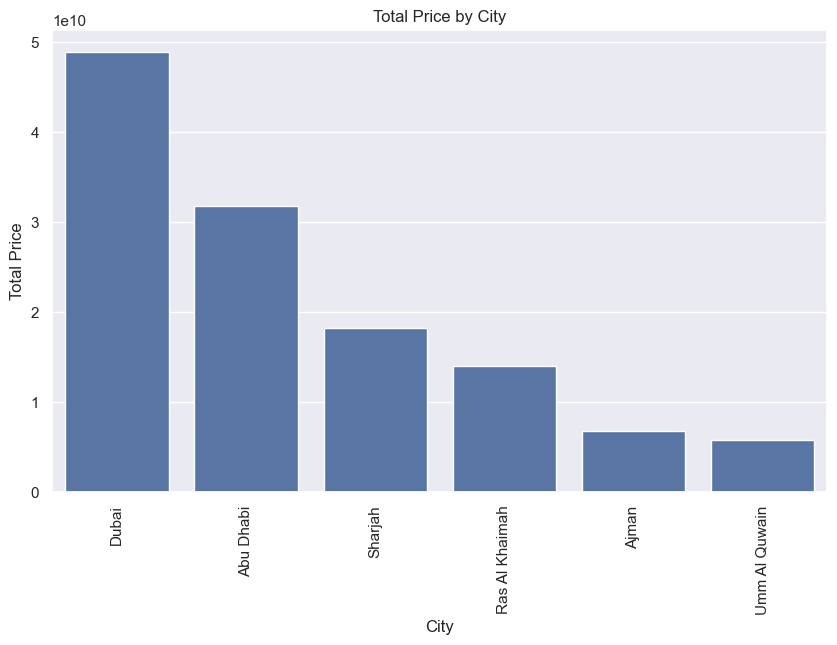

In [80]:
#@title **4.12 Total Price by City**
print(prop.groupby('City')['Price'].sum().sort_values(ascending=False))
plt.figure(figsize=(10, 6))
sns.barplot(x=prop.groupby('City')['Price'].sum().sort_values(ascending=False).index, y=prop.groupby('City')['Price'].sum().sort_values(ascending=False).values)
plt.title('Total Price by City')
plt.xlabel('City')
plt.ylabel('Total Price')
plt.xticks(rotation=90)
plt.show()

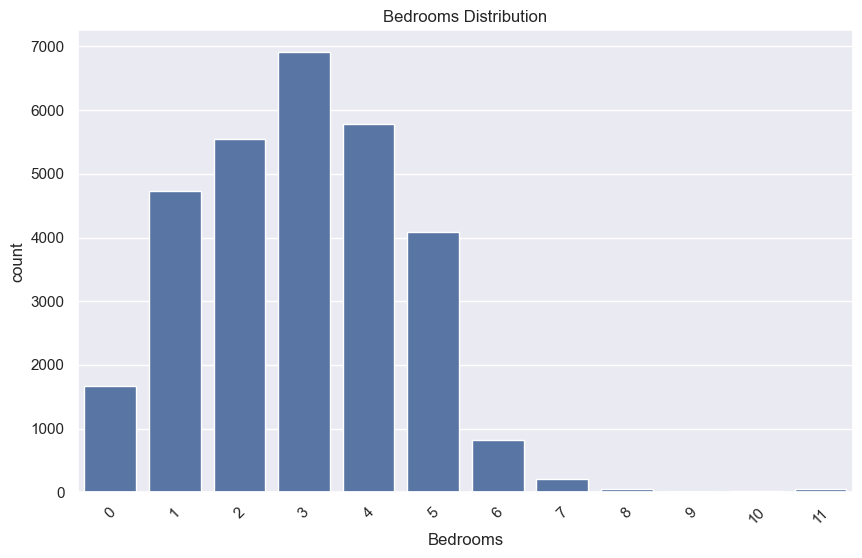

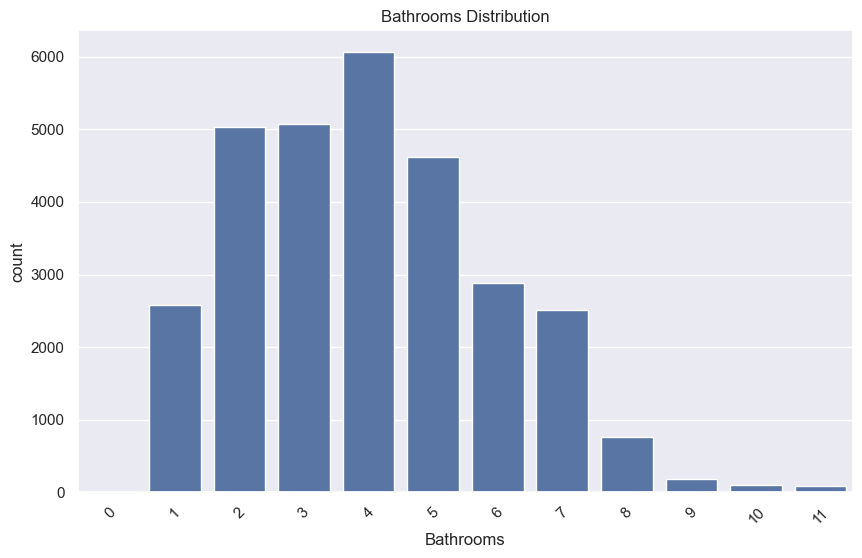

In [81]:
#@title **4.13 Bedrooms and Bathrooms Distribution**
sns.countplot(x='Bedrooms', data=prop)
plt.title('Bedrooms Distribution')
plt.xticks(rotation=45)
plt.show()
sns.countplot(x='Bathrooms', data=prop)
plt.title('Bathrooms Distribution')
plt.xticks(rotation=45)
plt.show()

City with the highest average price: City
Umm Al Quwain     1.319185e+07
Dubai             7.260970e+06
Ras Al Khaimah    4.509206e+06
Abu Dhabi         4.329870e+06
Sharjah           2.543601e+06
Ajman             1.327735e+06
Name: Price, dtype: float64


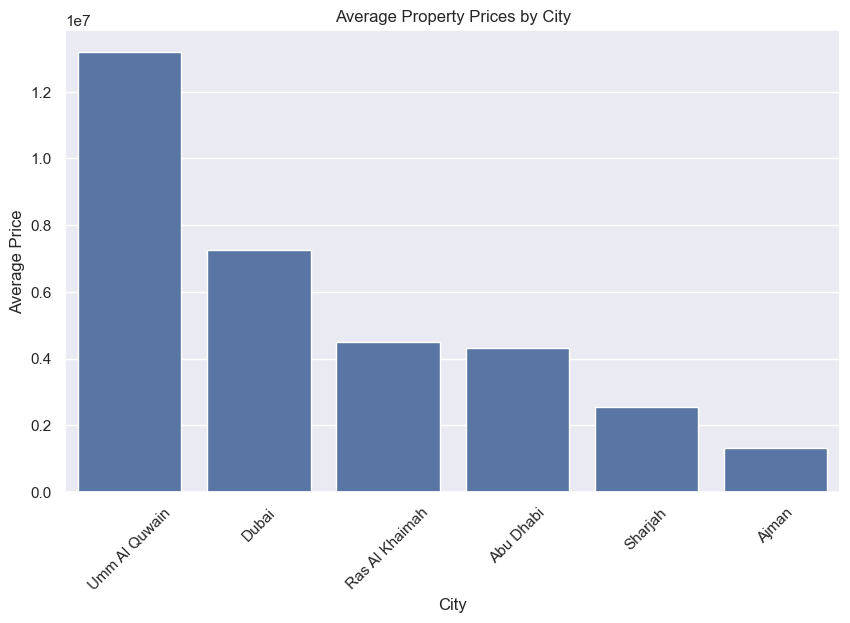

In [82]:
#@title **4.14 City with the highest average price**
# Group the data by city and calculate the average price for each city
Region_avg_price = prop.groupby('City')['Price'].mean().sort_values(ascending=False)

# Print the city with the highest average price
print("City with the highest average price:", Region_avg_price)

# Create a bar plot to visualize the average prices by city
plt.figure(figsize=(10, 6))
sns.barplot(x=Region_avg_price.index, y=Region_avg_price.values)
plt.title('Average Property Prices by City')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

City with the highest Property price: City
Dubai             750000000
Ajman             220000000
Abu Dhabi         150800000
Ras Al Khaimah     93546000
Umm Al Quwain      50000000
Sharjah            33000000
Name: Price, dtype: int64


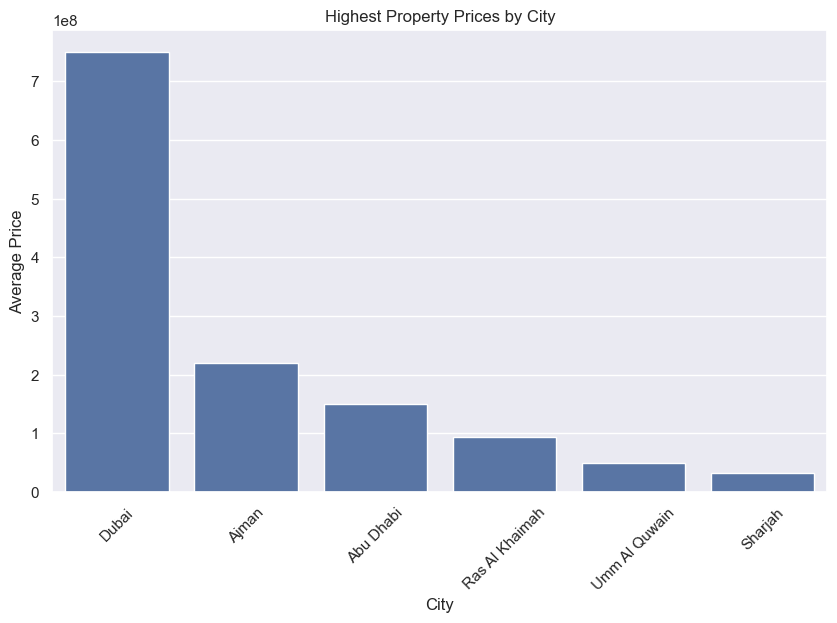

In [83]:
#@title **4.15 City with the highest price**
# Group the data by city and calculate the average price for each city
Region_avg_price = prop.groupby('City')['Price'].max().sort_values(ascending=False)

# Print the city with the highest average price
print("City with the highest Property price:", Region_avg_price)

# Create a bar plot to visualize the average prices by city
plt.figure(figsize=(10, 6))
sns.barplot(x=Region_avg_price.index, y=Region_avg_price.values)
plt.title('Highest Property Prices by City')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

Top 20 districts with the highest prices:
 District
Business Bay                       750000000
Palm Jumeirah                      482500000
Al Zahya                           220000000
Downtown Dubai                     175000000
Dubai Hills Estate                 160000000
Jumeirah                           152750000
Saadiyat Island                    150800000
Dubai Internet City                140000000
Dubai Harbour                      135000000
Dubai Marina                       119988000
Mohammed Bin Rashid City           115000000
Al Marjan Island                    93546000
Al Wasl                             75000000
Mohammed Bin Zayed City             75000000
Al Hudayriat Island                 60000000
Al Jaddaf                           57000000
Jumeirah Golf Estates               55000000
Jumeirah Village Triangle (JVT)     55000000
Emirates Hills                      55000000
Marina Village                      54999900
Name: Price, dtype: int64


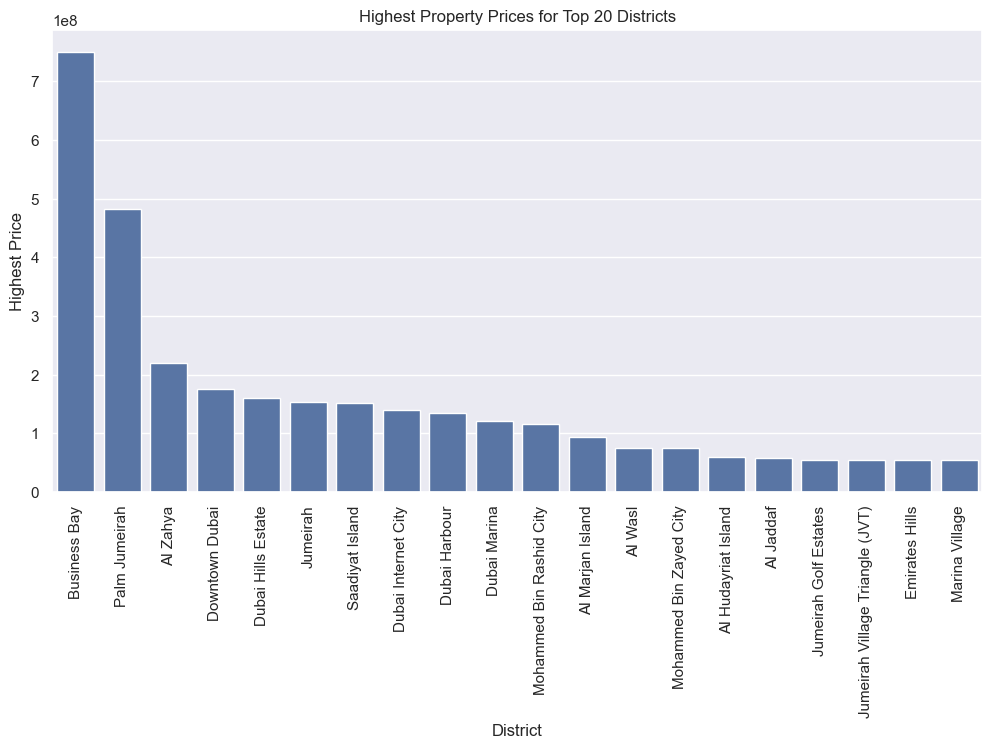

In [84]:
#@title **4.16 Top 20 districts with the highest prices**
# Group the data by district and calculate the price for each district
district_avg_prices = prop.groupby('District')['Price'].max().sort_values(ascending=False)

# Get the top 20 districts with the highest Hightest prices
top_20_districts = district_avg_prices.head(20)

# Print the top 20 districts
print("Top 20 districts with the highest prices:\n", top_20_districts)

# Create a bar plot to visualize the Hightest prices for the top 20 districts
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_districts.index, y=top_20_districts.values)
plt.title('Highest Property Prices for Top 20 Districts')
plt.xlabel('District')
plt.ylabel('Highest Price')
plt.xticks(rotation=90)
plt.show()

Top 20 districts with the highest average prices:
 District
Emirates Hills                 5.500000e+07
Dubai Internet City            3.736262e+07
Al Rifa                        3.300000e+07
Palm Jumeirah                  3.297452e+07
Pearl Jumeirah                 3.000000e+07
Marina Village                 2.999999e+07
Nurai Island                   2.979998e+07
Palm Jebel Ali                 2.932268e+07
Umm Al Sheif                   2.700000e+07
Al Bateen                      2.575000e+07
Jumeirah                       2.523298e+07
Al Safa                        2.500000e+07
Al Rawdah                      2.400000e+07
Business Bay                   2.343858e+07
Al Najda Street                2.300000e+07
Jumeirah Islands               2.291600e+07
Al Qurm                        2.133333e+07
Nareel Island                  2.100000e+07
Al Wasl                        2.091317e+07
The Ritz-Carlton Residences    1.822494e+07
Name: Price, dtype: float64


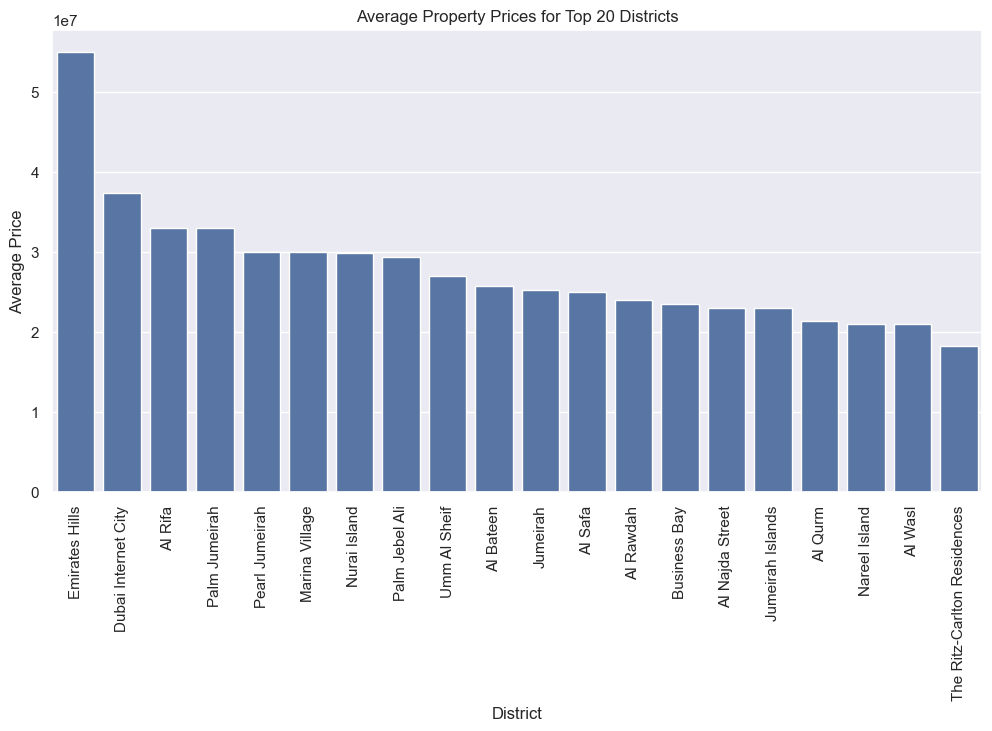

In [85]:
#@title **4.17 Top 20 districts with the highest average prices**
# Group the data by district and calculate the average price for each district
district_avg_prices = prop.groupby('District')['Price'].mean().sort_values(ascending=False)

# Get the top 20 districts with the highest average prices
top_20_districts = district_avg_prices.head(20)

# Print the top 20 districts
print("Top 20 districts with the highest average prices:\n", top_20_districts)

# Create a bar plot to visualize the average prices for the top 20 districts
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_districts.index, y=top_20_districts.values)
plt.title('Average Property Prices for Top 20 Districts')
plt.xlabel('District')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

In [86]:
#@title **4.18 Distance from city center**

# Define city center coordinates for each emirate
city_centers = {
    'Abu Dhabi': (24.4539, 54.3773),
    'Dubai': (25.276987, 55.296249),
    'Sharjah': (25.3463, 55.4209),
    'Ajman': (25.4052, 55.5136),
    'Ras Al Khaimah': (25.8007, 55.9764),
    'Umm Al Quwain': (25.5122, 55.5990),
    'Fujairah': (25.1288, 56.3265)
}

# Aggregate the sum of prices by district
district_price_sum = prop.groupby('District')['Price'].sum().reset_index()

# Get the top 10 and last 10 districts by sum of prices
top_10_districts = district_price_sum.nlargest(10, 'Price')
last_10_districts = district_price_sum.nsmallest(10, 'Price')

# Identify the highest and lowest districts
highest_district = top_10_districts.iloc[0]
lowest_district = last_10_districts.iloc[-1]

# Combine top 10 and last 10 districts
selected_districts = pd.concat([top_10_districts, last_10_districts])

# Filter the original dataframe for properties in the selected districts
filtered_prop = prop[prop['District'].isin(selected_districts['District'])]

# For each district, get the top 5 properties by price
top_properties_prop = filtered_prop.groupby('District').apply(lambda x: x.nlargest(5, 'Price')).reset_index(drop=True)

# Create a map centered around the average coordinates
center_lat = top_properties_prop['Latitude'].mean()
center_lon = top_properties_prop['Longitude'].mean()
map = folium.Map(location=[center_lat, center_lon], zoom_start=10)

# Add markers for the top properties in each district
for idx, row in top_properties_prop.iterrows():
    # Determine the icon color
    if row['District'] == highest_district['District']:
        icon = folium.Icon(color='green', icon='arrow-up')
    elif row['District'] == lowest_district['District']:
        icon = folium.Icon(color='red', icon='arrow-down')
    else:
        icon = folium.Icon(color='green' if row['District'] in top_10_districts['District'].values else 'red', icon='arrow-up' if row['District'] in top_10_districts['District'].values else 'arrow-down')

    # Add marker to the map
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"District: {row['District']}\nPrice: {row['Price']}\nArea: {row['Area']}",
        icon=icon
    ).add_to(map)

    # Calculate distance to the city center
    city_center_coords = city_centers[row['City']]
    distance_to_center = geodesic((row['Latitude'], row['Longitude']), city_center_coords).km

    # Add a polyline to mark the distance from the city center to the property
    folium.PolyLine(
        locations=[city_center_coords, (row['Latitude'], row['Longitude'])],
        color="blue",
        dash_array="5, 10"
    ).add_to(map)

    # Add distance label above the polyline with a blue background box
    mid_point = [(city_center_coords[0] + row['Latitude']) / 2, (city_center_coords[1] + row['Longitude']) / 2]
    folium.map.Marker(
        mid_point,
        icon=folium.DivIcon(
            html=f'''
                <div style="
                    background-color: #007bff;
                    color: white;
                    padding: 5px 47px;
                    border-radius: 10px;
                    border: 1px solid white;
                    font-size: 10pt;
                    font-weight: bold;
                    text-align: center;">
                    {distance_to_center:.2f} km
                </div>
            '''
        )
    ).add_to(map)

# Save the map to an HTML file
map.save('district_property_map_with_distances.html')

# To display in Jupyter notebook, use:
map

In [87]:
#@title **4.19 Missing Data**
prop.isnull().sum()

B_type                           0
Latitude                         0
Longitude                        0
Area                             0
Bedrooms                         0
Bathrooms                        0
City                             0
District                         0
View                         26277
Bulding_Descripton               0
Price_per_Sqft                   0
City_Avg_Price                   0
Price                            0
Distance_from_City_Center        0
dtype: int64

In [88]:
#@title **4.20 Dealing With Missing Data**

prop.drop(columns = ['Bulding_Descripton','View'], inplace=True)
prop.reset_index(drop=True, inplace=True)

# 3. Feature Engineering

In [89]:
#@title **5.1 Create new features Total Rooms**
prop['TotalRooms'] = prop['Bedrooms'] + prop['Bathrooms']

In [90]:
prop.shape

(29905, 13)

In [91]:
#@title **5.2 Dimensionality Reduction for District columns**
prop['District']=prop['District'].apply(lambda x: x.strip())
District_stats=prop.groupby('District')['District'].agg('count').sort_values(ascending=False)
District_less_than_10= District_stats[District_stats <= 10]
prop['District']=prop['District'].apply(lambda x: 'Others' if x in District_less_than_10 else x)

In [92]:
prop.shape

(29905, 13)

# 4. Preparing data for modeling

In [93]:
# @title  **6.1 Removing Outliers**

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
    return df

# Remove outliers for 'Price' and 'Area'
prop = remove_outliers_iqr(prop, 'Price')
prop = remove_outliers_iqr(prop, 'Area')

In [94]:
prop

,B_type,Latitude,Longitude,Area,Bedrooms,Bathrooms,City,District,Price_per_Sqft,City_Avg_Price,Price,Distance_from_City_Center,TotalRooms
0,Apartment,24.463860,54.595603,747.0,0,1,Abu Dhabi,Yas Island,1740.294511,4.329870e+06,1300000,22.119166,1
1,Apartment,24.487354,54.395122,1524.0,2,3,Abu Dhabi,Al Reem Island,1115.485564,4.329870e+06,1700000,4.133802,5
2,Apartment,24.492602,54.392677,1615.0,2,3,Abu Dhabi,Al Reem Island,1021.671827,4.329870e+06,1650000,4.576366,5
3,Apartment,24.484639,54.404103,1220.0,1,2,Abu Dhabi,Al Reem Island,655.737705,4.329870e+06,800000,4.362280,3
5,Apartment,24.488164,54.395035,904.0,1,2,Abu Dhabi,Al Reem Island,995.575221,4.329870e+06,900000,4.211320,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29898,Townhouses,25.691032,55.784255,1394.0,2,2,Ras Al Khaimah,Al Hamra Village,1183.644189,4.509206e+06,1650000,22.765497,4
29899,Townhouses,25.691032,55.784255,2718.0,4,5,Ras Al Khaimah,Al Hamra Village,2023.546726,4.509206e+06,5500000,22.765497,9
29901,Townhouses,25.691032,55.784255,2110.0,3,2,Ras Al Khaimah,Al Hamra Village,1510.426540,4.509206e+06,3187000,22.765497,5
29902,Townhouses,25.722171,55.844276,1964.0,2,3,Ras Al Khaimah,Mina Al Arab,1145.621181,4.509206e+06,2250000,15.835813,5


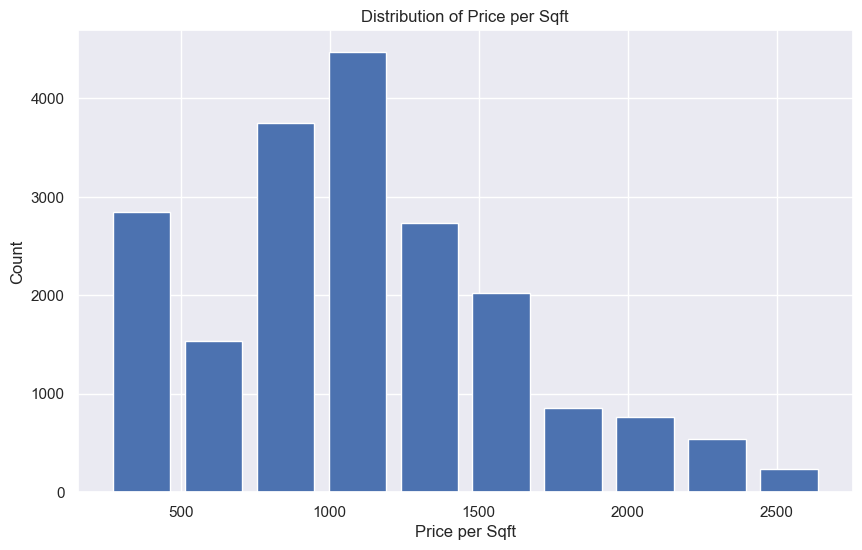

In [95]:
# Filter out properties with Area per TotalRooms less than 200
prop_6 = prop[~(prop.Area / prop.TotalRooms < 200)]

# Remove outliers by 'Price_per_Sqft' within each city
def remove_outliers_by_city(df, column, group_by_column):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby([group_by_column]):
        m = np.mean(subdf[column])
        st = np.std(subdf[column])
        reduced_df = subdf[(subdf[column] > (m - st)) & (subdf[column] <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

prop = remove_outliers_by_city(prop_6, 'Price_per_Sqft', 'City')

# Plotting the distribution of 'Price_per_Sqft'
plt.rcParams['figure.figsize'] = (10, 6)
plt.hist(prop['Price_per_Sqft'], rwidth=0.8)
plt.xlabel('Price per Sqft')
plt.ylabel('Count')
plt.title('Distribution of Price per Sqft')
plt.show()

In [96]:
prop.shape

(19749, 13)

In [97]:
#@title **6.2 Remove columns**
prop.drop(columns=['TotalRooms','Price_per_Sqft','Latitude','Longitude','City_Avg_Price','Distance_from_City_Center'], inplace=True)

In [98]:
#@title **6.3 Identify categorical and numerical columns**
# Define categorical and numerical columns
categorical_cols = ['B_type', 'District', 'City']
numerical_cols = [col for col in prop.columns if col not in categorical_cols + ['Price']]

# One-hot encode categorical features
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
categorical_encoded = one_hot_encoder.fit_transform(prop[categorical_cols])
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_cols))

# Merge encoded categorical features back into the DataFrame
prop = pd.concat([prop, categorical_encoded_df], axis=1)
prop.drop(columns=categorical_cols, inplace=True)

# Scale numerical features
scaler = StandardScaler()
prop[numerical_cols] = scaler.fit_transform(prop[numerical_cols])

In [99]:
prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19749 entries, 0 to 19748
Columns: 146 entries, Area to City_Umm Al Quwain
dtypes: float64(145), int64(1)
memory usage: 22.0 MB


# 5. Modeling

In [100]:
#@title **7.1 Spilting Data**
X = prop.drop('Price', axis=1)
y = prop['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
X.columns

Index(['Area', 'Bedrooms', 'Bathrooms', 'B_type_ Apartment',
       'B_type_Hotel Apartments', 'B_type_Penthouse', 'B_type_Townhouses',
       'B_type_Villa Compound', 'B_type_Villas',
       'District_Abu Dhabi Gate City (Officers City)',
       ...
       'District_Umm Suqeim', 'District_Yas Island', 'District_Za'abeel',
       'District_Zayed City', 'City_Abu Dhabi', 'City_Ajman', 'City_Dubai',
       'City_Ras Al Khaimah', 'City_Sharjah', 'City_Umm Al Quwain'],
      dtype='object', length=145)

In [102]:
#@title **7.2 Model Selection**
rf_reg = RandomForestRegressor()
gb_reg = GradientBoostingRegressor()

In [103]:
#@title **7.3 Define the Best Parameters For the Models Using Grid Search**
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

param_grid_gb = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10]
}

# Number of iterations for RandomizedSearchCV
n_iter_search = 15
# Grid Search for Random Forest
random_search_rf = RandomizedSearchCV(estimator=rf_reg, param_distributions=param_grid_rf, n_iter=n_iter_search, cv=3, n_jobs=-1, verbose=2)
random_search_rf.fit(X_train, y_train)
print("Best Parameters for Random Forest:", random_search_rf.best_params_)
best_rf_reg = random_search_rf.best_estimator_

#Grid Search for Gradient Boosting
random_search_gb = RandomizedSearchCV(estimator=gb_reg, param_distributions=param_grid_gb, n_iter=n_iter_search, cv=3, n_jobs=-1, verbose=2)
random_search_gb.fit(X_train, y_train)
print("Best Parameters for Gradient Boosting:", random_search_gb.best_params_)
best_gb_reg = random_search_gb.best_estimator_

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=  11.2s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  16.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  16.6s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  17.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   8.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   8.2s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  28.9s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200;

In [104]:
#@title **7.4 Using Cross-validation to Avoid Overfitting**
cv_scores_rf = cross_val_score(best_rf_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rf_cv_rmse = np.sqrt(-cv_scores_rf)
print("Random Forest Cross-Validation MSE Scores:", -cv_scores_rf)
print("Random Forest Average Cross-Validation MSE:", -cv_scores_rf.mean())
print("Random Forest CV RMSE:", rf_cv_rmse.mean())

# Cross-validation with Gradient Boosting
cv_scores_gb = cross_val_score(best_gb_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
gb_cv_rmse = np.sqrt(-cv_scores_gb)
print("Gradient Boosting CV RMSE:", gb_cv_rmse.mean())
print("Gradient Boosting Cross-Validation MSE Scores:", -cv_scores_gb)
print("Gradient Boosting Average Cross-Validation MSE:", -cv_scores_gb.mean())

Random Forest Cross-Validation MSE Scores: [8.50218730e+10 9.55908985e+10 9.48124278e+10 8.81308734e+10
 9.48221351e+10]
Random Forest Average Cross-Validation MSE: 91675641580.9205
Random Forest CV RMSE: 302695.9249307029
Gradient Boosting CV RMSE: 296400.8218924527
Gradient Boosting Cross-Validation MSE Scores: [8.49102183e+10 9.28012018e+10 8.65167839e+10 8.74148041e+10
 8.77227883e+10]
Gradient Boosting Average Cross-Validation MSE: 87873159283.50948


In [105]:
#@title **7.5 Train Models**
best_rf_reg.fit(X_train, y_train)
best_gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, min_samples_split=10, n_estimators=500,
                          subsample=0.8)

In [106]:
y_train_pred_rf = best_rf_reg.predict(X_train)
y_train_pred_gb = best_gb_reg.predict(X_train)

In [107]:
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

# Evaluate each model
metrics_rf = calculate_metrics(y_train, y_train_pred_rf)
metrics_gb = calculate_metrics(y_train, y_train_pred_gb)

# Print results
print("Random Forest     - MSE: {:.4f}, RMSE: {:.4f}, MAE: {:.4f}, R²: {:.4f}".format(*metrics_rf))
print("Gradient Boosting - MSE: {:.4f}, RMSE: {:.4f}, MAE: {:.4f}, R²: {:.4f}".format(*metrics_gb))

Random Forest     - MSE: 34185386766.9051, RMSE: 184892.9062, MAE: 108252.6374, R²: 0.9797
Gradient Boosting - MSE: 57655066631.8605, RMSE: 240114.6947, MAE: 168371.9679, R²: 0.9657


In [108]:
#@title **7.6 Test Models**
y_pred_rf = best_rf_reg.predict(X_test)
y_pred_gb = best_gb_reg.predict(X_test)

In [109]:
#@title **7.7  Models Evaluating**
models = {

    'Random Forest': y_pred_rf,
    'Gradient Boosting': y_pred_gb
}

for name, y_pred in models.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - MSE: {mse}, R2: {r2}')

Random Forest - MSE: 89786121359.23546, R2: 0.9467866912365289
Gradient Boosting - MSE: 95030102899.56511, R2: 0.9436787542343388


In [110]:
def predict_price(Area, Bedrooms, Bathrooms, Building_Type, District, City):
    # Create an array of zeros with the same length as the number of columns in X
    x = np.zeros(len(X.columns))

    # Assign values to the respective positions in the feature array
    x[np.where(X.columns == 'Area')[0][0]] = Area
    x[np.where(X.columns == 'Bedrooms')[0][0]] = Bedrooms
    x[np.where(X.columns == 'Bathrooms')[0][0]] = Bathrooms

    # Set the one-hot encoded value for Building_Type
    bt_col = f'B_type_{Building_Type}'
    if bt_col in X.columns:
        x[np.where(X.columns == bt_col)[0][0]] = 1

    # Set the one-hot encoded value for District
    district_col = f'District_{District}'
    if district_col in X.columns:
        x[np.where(X.columns == district_col)[0][0]] = 1

    # Set the one-hot encoded value for City
    city_col = f'City_{City}'
    if city_col in X.columns:
        x[np.where(X.columns == city_col)[0][0]] = 1

    # Scale the numerical features
    numerical_features = ['Area', 'Bedrooms', 'Bathrooms']
    x[[np.where(X.columns == col)[0][0] for col in numerical_features]] = scaler.transform(x[[np.where(X.columns == col)[0][0] for col in numerical_features]].reshape(1, -1))

    # Make the prediction using the trained Gradient Boosting model
    return best_gb_reg.predict([x])[0]

In [111]:
Area = 2000
Bedrooms = 2
Bathrooms = 3
Building_Type = "Apartment"
District = "Saadiyat Island"
City = "Abu Dhabi"

# Predict the price
predicted_price = predict_price(Area, Bedrooms, Bathrooms, Building_Type, District, City)
# Calculate price per square foot
price_per_sqft = predicted_price / Area

# Format the predicted price and price per square foot to include commas
formatted_price = f"{predicted_price:,.2f}"
formatted_price_per_sqft = f"{price_per_sqft:,.2f}"

# Print the results
print(f"The predicted price for the property is: {formatted_price} AED")
print(f"The price per square foot is: {formatted_price_per_sqft} AED/sqft")

The predicted price for the property is: 2,761,023.02 AED
The price per square foot is: 1,380.51 AED/sqft
